# RFM Analysis (Clustring Project)

### 🔵 Import Libraries

In [324]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
import datetime as dt
pd.options.display.float_format = '{:,.2f}' .format

In [325]:
def HeatMapp(data , title , xlabel , ylabel , color):
    plt.figure(figsize=(15, 9))
    sns.heatmap( data , annot=True, fmt='g', cmap=color)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    return plt.show()

### 🟢 Ready Data

In [326]:
df_trans = pd.read_csv('Transactions.csv')
df_cat = pd.read_csv('Categories.csv')

In [327]:
display(df_trans.head(3))
print ('')
display(df_cat.head(3))

CustomerID    MerchantName  TransactionRank  TransactionRedeemedPoints  \
0           1   Grill Emperor                1                       4427   
1           2  Threads Royale                1                       2490   
2           3        Cakeland                1                       3000   

   TransactionValue  TransactionFrom(days)  CustomerLastTransactionFrom(days)  
0            442.70                    281                                281  
1            249.00                     34                                 34  
2            300.00                    236                                236

MerchantName Category
0   Grill Emperor      F&B
1  Threads Royale  fashion
2        Cakeland      F&B

In [328]:
df_trans

CustomerID         MerchantName  TransactionRank  \
0               1        Grill Emperor                1   
1               2       Threads Royale                1   
2               3             Cakeland                1   
3               4       Threads Royale                1   
4               5           Quick Stop                1   
...           ...                  ...              ...   
43924       33519          Zest Market                1   
43925       33520          Zest Market                1   
43926       33521  Marketplace Central                1   
43927       33521  Marketplace Central                2   
43928       33521        Peppers Diner                1   

       TransactionRedeemedPoints  TransactionValue  TransactionFrom(days)  \
0                           4427            442.70                    281   
1                           2490            249.00                     34   
2                           3000            300.00                    236   
3                           1620            162.00                    320   
4                            700             70.00                    407   
...                          ...               ...                    ...   
43924                       1320            132.00                    256   
43925                       2100            210.00                     13   
43926                       2180            218.00                    225   
43927                       1540            154.00                     55   
43928                       1960            196.00                    449   

       CustomerLastTransactionFrom(days)  
0                                    281  
1                                     34  
2                                    236  
3                                    320  
4                                    407  
...                                  ...  
43924                                256  
43925                                 13  
43926                                 55  
43927                                 55  
43928                                 55  

[43929 rows x 7 columns]

In [329]:
df_trans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43929 entries, 0 to 43928
Data columns (total 7 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   CustomerID                         43929 non-null  int64  
 1   MerchantName                       43929 non-null  object 
 2   TransactionRank                    43929 non-null  int64  
 3   TransactionRedeemedPoints          43929 non-null  int64  
 4   TransactionValue                   43929 non-null  float64
 5   TransactionFrom(days)              43929 non-null  int64  
 6   CustomerLastTransactionFrom(days)  43929 non-null  int64  
dtypes: float64(1), int64(5), object(1)
memory usage: 2.3+ MB


In [330]:
# Exploring Number
reusults = []
for c in df_trans.columns:
    unique_count = df_trans[c].nunique()
    dup_count = df_trans[c].duplicated().sum()
    ValCount = df_trans[c].count()
    NullVal = df_trans[c].isnull().sum()
    Min = '-' if df_trans[c].dtype != 'int64'  else round(df_trans[c].min() , 1)
    Max = '-' if df_trans[c].dtype != 'int64'  else round(df_trans[c].max() , 1)
    AVG = '-' if df_trans[c].dtype != 'int64'  else round(df_trans[c].mean() , 1)
    Median = '-' if df_trans[c].dtype != 'int64'  else round(df_trans[c].median() , 1)
    reusults.append({'ColName' : c, 'Nunique' : unique_count, 'Duplicated' : dup_count, 'ValCount' : ValCount ,'NullVal' : NullVal , 'Min' : Min , 'Max' : Max , 'AVG' : AVG ,'Median' : Median})
pd.DataFrame(reusults)

ColName  Nunique  Duplicated  ValCount  NullVal  \
0                         CustomerID    33521       10408     43929        0   
1                       MerchantName       59       43870     43929        0   
2                    TransactionRank       17       43912     43929        0   
3          TransactionRedeemedPoints     5945       37984     43929        0   
4                   TransactionValue     5945       37984     43929        0   
5              TransactionFrom(days)      574       43355     43929        0   
6  CustomerLastTransactionFrom(days)      528       43401     43929        0   

  Min     Max       AVG    Median  
0   1   33521 17,162.80 17,531.00  
1   -       -         -         -  
2   1      17      1.30      1.00  
3   0  263800  3,352.50  1,890.00  
4   -       -         -         -  
5   1     698    185.20    203.00  
6   1     682    143.90    115.00

In [331]:
# Exploring Number
reusults = []
for c in df_cat.columns:
    unique_count = df_cat[c].nunique()
    dup_count = df_cat[c].duplicated().sum()
    ValCount = df_cat[c].count()
    NullVal = df_cat[c].isnull().sum()
    Min = '-' if df_cat[c].dtype != 'int64'  else round(df_cat[c].min() , 1)
    Max = '-' if df_cat[c].dtype != 'int64'  else round(df_cat[c].max() , 1)
    AVG = '-' if df_cat[c].dtype != 'int64'  else round(df_cat[c].mean() , 1)
    Median = '-' if df_cat[c].dtype != 'int64'  else round(df_cat[c].median() , 1)
    reusults.append({'ColName' : c, 'Nunique' : unique_count, 'Duplicated' : dup_count, 'ValCount' : ValCount ,'NullVal' : NullVal , 'Min' : Min , 'Max' : Max , 'AVG' : AVG ,'Median' : Median})
pd.DataFrame(reusults)

ColName  Nunique  Duplicated  ValCount  NullVal Min Max AVG Median
0  MerchantName       59           0        59        0   -   -   -      -
1      Category       13          46        59        0   -   -   -      -

In [332]:
# Concat DataFrames
df = pd.merge (left = df_trans , right =  df_cat )
df = df[["CustomerID","MerchantName","Category","TransactionRank","TransactionRedeemedPoints","TransactionValue","TransactionFrom(days)","CustomerLastTransactionFrom(days)"]]
df

CustomerID         MerchantName Category  TransactionRank  \
0               1        Grill Emperor      F&B                1   
1               2       Threads Royale  fashion                1   
2               3             Cakeland      F&B                1   
3               4       Threads Royale  fashion                1   
4               5           Quick Stop  Grocery                1   
...           ...                  ...      ...              ...   
43924       33519          Zest Market  Groceri                1   
43925       33520          Zest Market  Groceri                1   
43926       33521  Marketplace Central  Grocery                1   
43927       33521  Marketplace Central  Grocery                2   
43928       33521        Peppers Diner      F_B                1   

       TransactionRedeemedPoints  TransactionValue  TransactionFrom(days)  \
0                           4427            442.70                    281   
1                           2490            249.00                     34   
2                           3000            300.00                    236   
3                           1620            162.00                    320   
4                            700             70.00                    407   
...                          ...               ...                    ...   
43924                       1320            132.00                    256   
43925                       2100            210.00                     13   
43926                       2180            218.00                    225   
43927                       1540            154.00                     55   
43928                       1960            196.00                    449   

       CustomerLastTransactionFrom(days)  
0                                    281  
1                                     34  
2                                    236  
3                                    320  
4                                    407  
...                                  ...  
43924                                256  
43925                                 13  
43926                                 55  
43927                                 55  
43928                                 55  

[43929 rows x 8 columns]

### 🟢 Data Exploration and Data Cleaning/Cleansing

In [333]:
df[df['CustomerID'] == 33521]

CustomerID         MerchantName Category  TransactionRank  \
43926       33521  Marketplace Central  Grocery                1   
43927       33521  Marketplace Central  Grocery                2   
43928       33521        Peppers Diner      F_B                1   

       TransactionRedeemedPoints  TransactionValue  TransactionFrom(days)  \
43926                       2180            218.00                    225   
43927                       1540            154.00                     55   
43928                       1960            196.00                    449   

       CustomerLastTransactionFrom(days)  
43926                                 55  
43927                                 55  
43928                                 55

In [334]:
# Check duplication
df.duplicated().sum()

0

In [335]:
# CustomerID
df.CustomerID.nunique()

33521

In [336]:
# MerchantName
df.MerchantName.nunique()

59

In [337]:
df.MerchantName.value_counts()

MerchantName
Marketplace Central         19389
Family Grocers               6920
Zest Market                  4269
Grill Emperor                3392
Threads Royale               2972
Herbal Wellness              1478
Cakeland                     1302
Aroma Beans                  1012
Smokehouse Grill              910
Nuts & Seeds Co.              554
City Squad Fashions           328
Peppers Diner                 158
Urban Rides                   147
Quick Stop                    143
Gizmo Genius                  137
Rainbow Electronics           104
Mamma Mia                      88
FryBird                        47
Canal Mart                     46
TouchTech Innovations          46
Zanobia Textiles               45
Retro Rewind                   41
Cinema Egypt                   38
Sweets & Fizz                  37
TechWave                       35
Lola Market                    31
TickTock Time                  27
Playland                       20
Pie Corner                     19
G

In [338]:
# Category
df.Category.nunique()

13

In [339]:
df.Category.value_counts().sort_index()

Category
Car Services          27
Electronics          280
Entertainment         38
F&B                 7009
F_B                  733
Fashion              396
Groceri             4272
Grocery            26483
Health & Beauty     1520
Jewerlies             20
Optics                17
Transportaion        147
fashion             2987
Name: count, dtype: int64

In [340]:
def CAT (i):
    if i == 'F_B':
        return 'F&B'
    else:
        return i
df.Category = df.Category.apply(CAT)
df.Category.value_counts()

Category
Grocery            26483
F&B                 7742
Groceri             4272
fashion             2987
Health & Beauty     1520
Fashion              396
Electronics          280
Transportaion        147
Entertainment         38
Car Services          27
Jewerlies             20
Optics                17
Name: count, dtype: int64

In [341]:
# TransactionRank
df.TransactionRank.nunique()

17

In [342]:
df.TransactionRank.value_counts()

TransactionRank
1     36499
2      5124
3      1329
4       509
5       209
6       107
7        60
8        35
9        22
10       13
11       10
12        6
13        2
14        1
15        1
16        1
17        1
Name: count, dtype: int64

count   43,929.00
mean         1.27
std          0.78
min          1.00
25%          1.00
50%          1.00
75%          1.00
max         17.00
Name: TransactionRank, dtype: float64

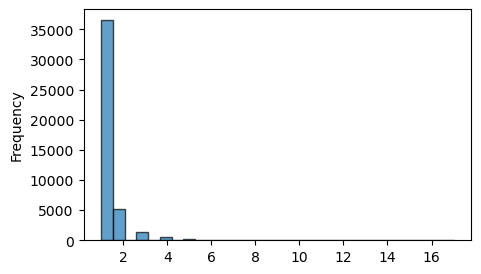

In [343]:
display(df.TransactionRank.describe())
df['TransactionRank'].plot(kind='hist', bins=30, edgecolor='black', alpha=0.7, figsize=(5,3));

count    43,929.00
mean      3,352.55
std       5,916.63
min           0.00
25%       1,220.00
50%       1,890.00
75%       3,118.00
max     263,800.00
Name: TransactionRedeemedPoints, dtype: float64

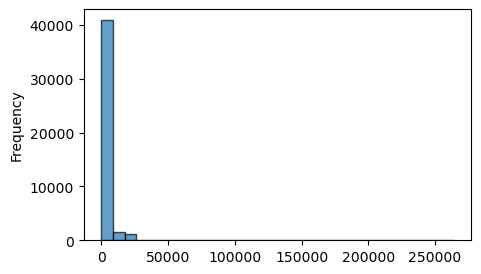

In [344]:
# Plot a histogram to visualize the distribution
display(df.TransactionRedeemedPoints.describe())
df['TransactionRedeemedPoints'].plot(kind='hist', bins=30, edgecolor='black', alpha=0.7, figsize=(5,3));

count   43,929.00
mean       335.25
std        591.66
min          0.00
25%        122.00
50%        189.00
75%        311.80
max     26,380.00
Name: TransactionValue, dtype: float64

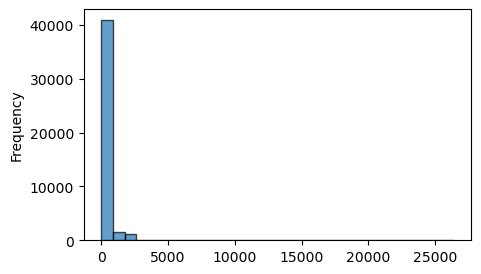

In [345]:
# TransactionValue
display(df.TransactionValue.describe())
df['TransactionValue'].plot(kind='hist', bins=30, edgecolor='black', alpha=0.7, figsize=(5,3));

count   43,929.00
mean       185.20
std        122.21
min          1.00
25%         62.00
50%        203.00
75%        271.00
max        698.00
Name: TransactionFrom(days), dtype: float64

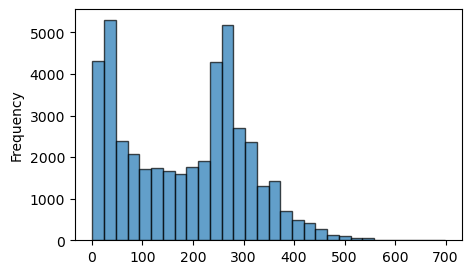

In [346]:
# TransactionFrom(days)
display(df['TransactionFrom(days)'].describe())
df['TransactionFrom(days)'].plot(kind='hist', bins=30, edgecolor='black', alpha=0.7, figsize=(5,3));

count   43,929.00
mean       143.87
std        114.99
min          1.00
25%         34.00
50%        115.00
75%        252.00
max        682.00
Name: CustomerLastTransactionFrom(days), dtype: float64

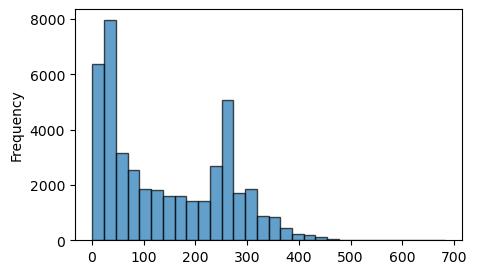

In [347]:
# CustomerLastTransactionFrom(days)
display(df['CustomerLastTransactionFrom(days)'].describe())
df['CustomerLastTransactionFrom(days)'].plot(kind='hist', bins=30, edgecolor='black', alpha=0.7, figsize=(5,3));

### 🟡 EDA

In [414]:
df.head(1)

CustomerID   MerchantName Category  TransactionRank  \
0           1  Grill Emperor      F&B                1   

   TransactionRedeemedPoints  TransactionValue  TransactionFrom(days)  \
0                       4427            442.70                    281   

   CustomerLastTransactionFrom(days) TransactionFrom(Range)  \
0                                281              200 : 300   

  CustomerLastTransactionFrom(Range)  
0                          200 : 300

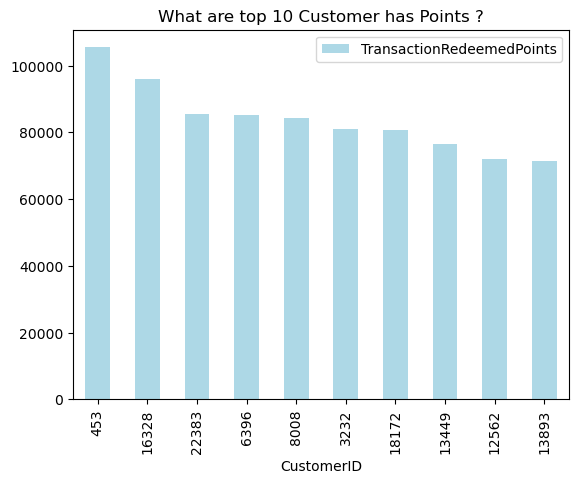

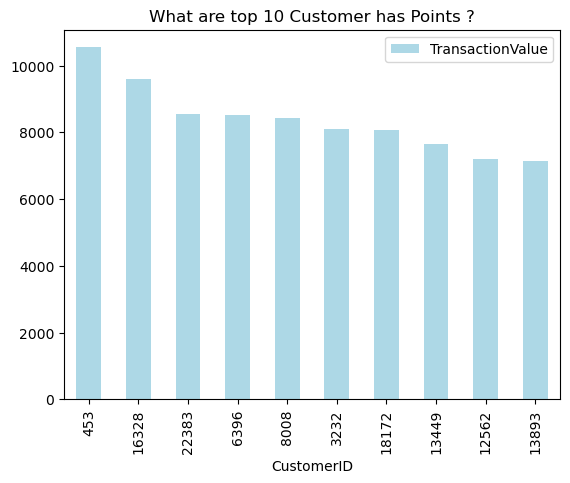

In [349]:
# What are top 10 Customer has Points & Value
msk_1 = df.groupby('CustomerID')[['TransactionRedeemedPoints','TransactionValue']].mean().reset_index().sort_values(by = 'TransactionRedeemedPoints' , ascending = False).reset_index(drop = True).head(10)

# Plot 'TransactionRedeemedPoints' as a bar chart with light blue color
msk_1.plot(kind='bar', x='CustomerID', y='TransactionRedeemedPoints', color='lightblue', legend=True , title = 'What are top 10 Customer has Points ?')
msk_1.plot(kind='bar', x='CustomerID', y='TransactionValue', color='lightblue', legend=True , title = 'What are top 10 Customer has Points ?')

plt.show()

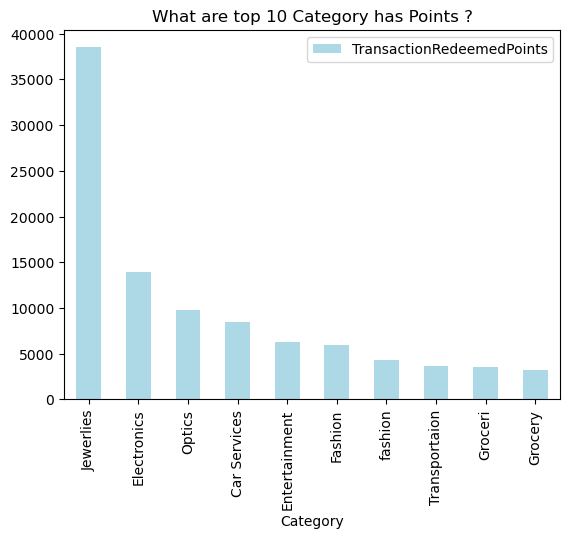

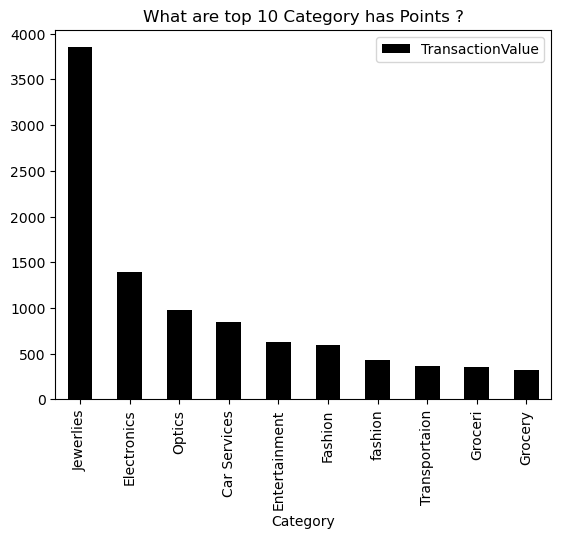

In [350]:
# What are top 10 Catefories has Points & Value
msk_2 = df.groupby('Category')[['TransactionRedeemedPoints','TransactionValue']].mean().reset_index().sort_values(by = 'TransactionRedeemedPoints' , ascending = False).reset_index(drop = True).head(10)

# Plot 'TransactionRedeemedPoints' as a bar chart with light blue color
msk_2.plot(kind='bar', x='Category', y='TransactionRedeemedPoints', color='lightblue', legend=True , title = 'What are top 10 Category has Points ?')
msk_2.plot(kind='bar', x='Category', y='TransactionValue', color='black', legend=True , title = 'What are top 10 Category has Points ?')

plt.show()

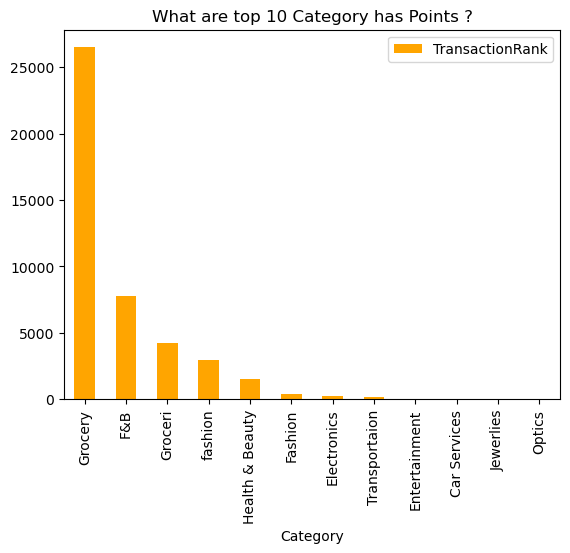

In [351]:
# What are top 10 Catefories in rank
msk_3 = df.groupby('Category')[['TransactionRank']].count().reset_index().sort_values(by = 'TransactionRank' , ascending = False).reset_index(drop = True)

# Plot 'TransactionRedeemedPoints' as a bar chart with light blue color
msk_3.plot(kind='bar', x='Category', y='TransactionRank', color='orange', legend=True , title = 'What are top 10 Category has Points ?')

plt.show()

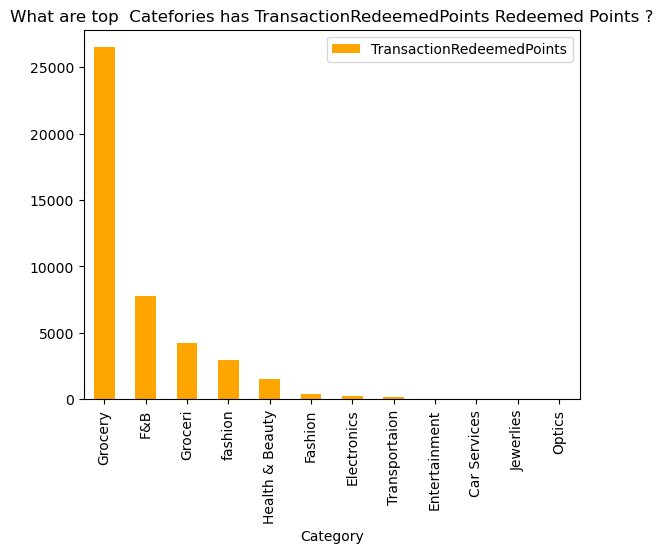

In [418]:
# What are top  Catefories has TransactionRedeemedPoints Redeemed Points
msk_4 = df.groupby('Category')[['TransactionRedeemedPoints']].count().reset_index().sort_values(by = 'TransactionRedeemedPoints' , ascending = False).reset_index(drop = True)

# Plot 'TransactionRedeemedPoints' as a bar chart with light blue color
msk_4.plot(kind='bar', x='Category', y='TransactionRedeemedPoints', color='orange', legend=True , title = 'What are top  Catefories has TransactionRedeemedPoints Redeemed Points ?')
plt.show()

In [353]:
df['TransactionFrom(days)'].describe()

count   43,929.00
mean       185.20
std        122.21
min          1.00
25%         62.00
50%        203.00
75%        271.00
max        698.00
Name: TransactionFrom(days), dtype: float64

In [354]:
msk_5 = df[ ( df['TransactionFrom(days)'] > df['TransactionFrom(days)'].quantile()  ) & ( df['TransactionRank'] > df['TransactionRank'].quantile()  )]
msk_5.groupby('Category')['TransactionRedeemedPoints'].mean().sort_values(ascending = False).reset_index()

Category  TransactionRedeemedPoints
0        Jewerlies                  80,240.00
1    Entertainment                   5,554.00
2      Electronics                   5,248.00
3          fashion                   4,984.91
4          Groceri                   3,520.63
5              F&B                   3,473.22
6          Grocery                   3,369.82
7  Health & Beauty                   2,273.92
8    Transportaion                   1,050.00
9     Car Services                      20.00

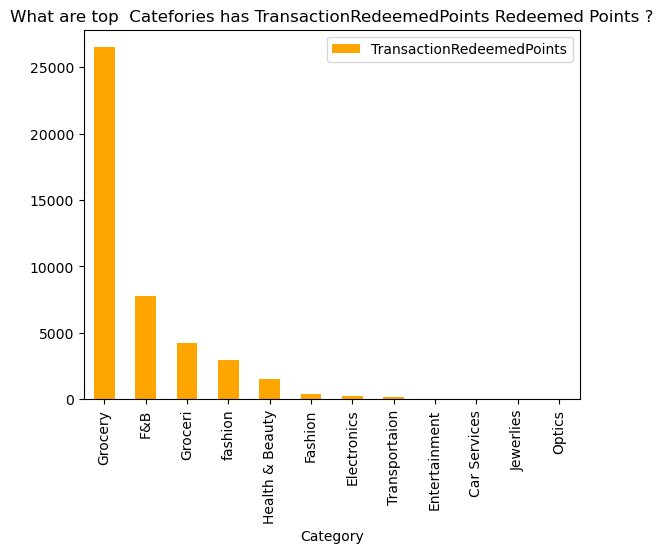

In [420]:
# What are top Categories has Transaction Redeemed Points
msk_6 = df.groupby('Category')[['TransactionRedeemedPoints']].count().reset_index().sort_values(by = 'TransactionRedeemedPoints' , ascending = False).reset_index(drop = True)

# Plot 'TransactionRedeemedPoints' as a bar chart with light blue color
msk_x = msk_6.plot(kind='bar', x='Category', y='TransactionRedeemedPoints', color='orange', legend=True , title = 'What are top  Catefories has TransactionRedeemedPoints Redeemed Points ?')
for i in msk_x.containers:
    ax.bar_label(i, label_type='edge', fmt='%d')
plt.show()

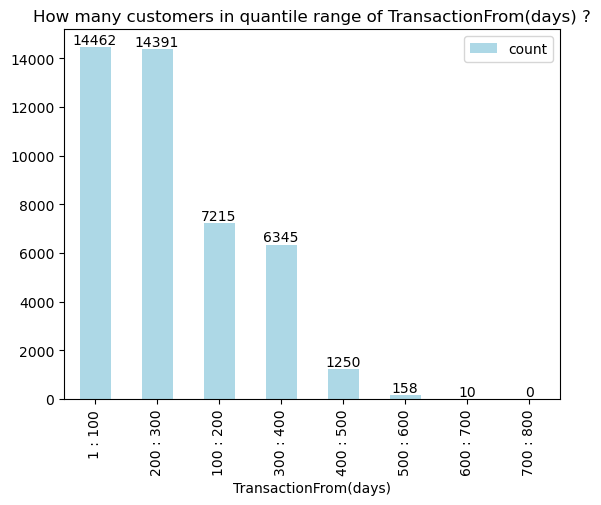

In [421]:
# How many customers in quantile range of TransactionFrom(days)
bins = [1 , 100 , 200 , 300 , 400 , 500 , 600 , 700 , 800 ]
labels = ['1 : 100' , '100 : 200' , '200 : 300' , '300 : 400' , '400 : 500' , '500 : 600' , '600 : 700' , '700 : 800']
msk_7 = pd.cut(df['TransactionFrom(days)'] , bins=bins , labels=labels).value_counts().reset_index()
ax = msk_7.plot(kind='bar', x='TransactionFrom(days)', y='count', color='lightblue', legend=True , title = 'How many customers in quantile range of TransactionFrom(days) ?')
for i in ax.containers:
    ax.bar_label(i, label_type='edge', fmt='%d')

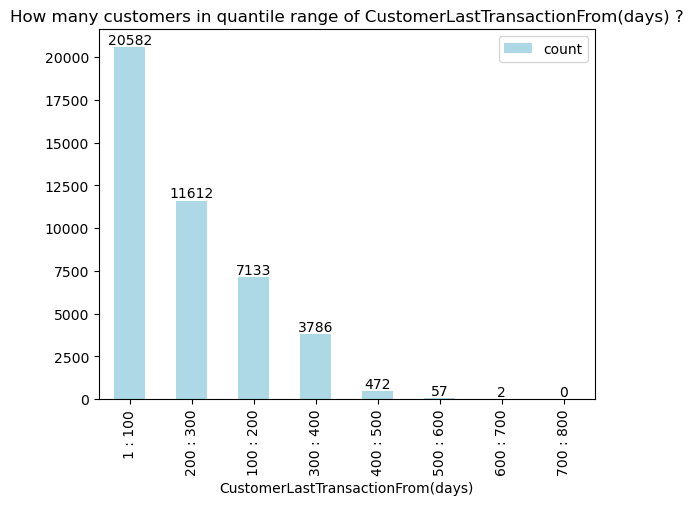

In [422]:
# How many customers in quantile range of CustomerLastTransactionFrom(days)
bins = [1 , 100 , 200 , 300 , 400 , 500 , 600 , 700 , 800 ]
labels = ['1 : 100' , '100 : 200' , '200 : 300' , '300 : 400' , '400 : 500' , '500 : 600' , '600 : 700' , '700 : 800']
msk_8 = pd.cut(df['CustomerLastTransactionFrom(days)'] , bins=bins , labels=labels).value_counts().reset_index()
ax = msk_8.plot(kind='bar', x='CustomerLastTransactionFrom(days)', y='count', color='lightblue', legend=True , title = 'How many customers in quantile range of CustomerLastTransactionFrom(days) ?')
for i in ax.containers:
    ax.bar_label(i, label_type='edge', fmt='%d')

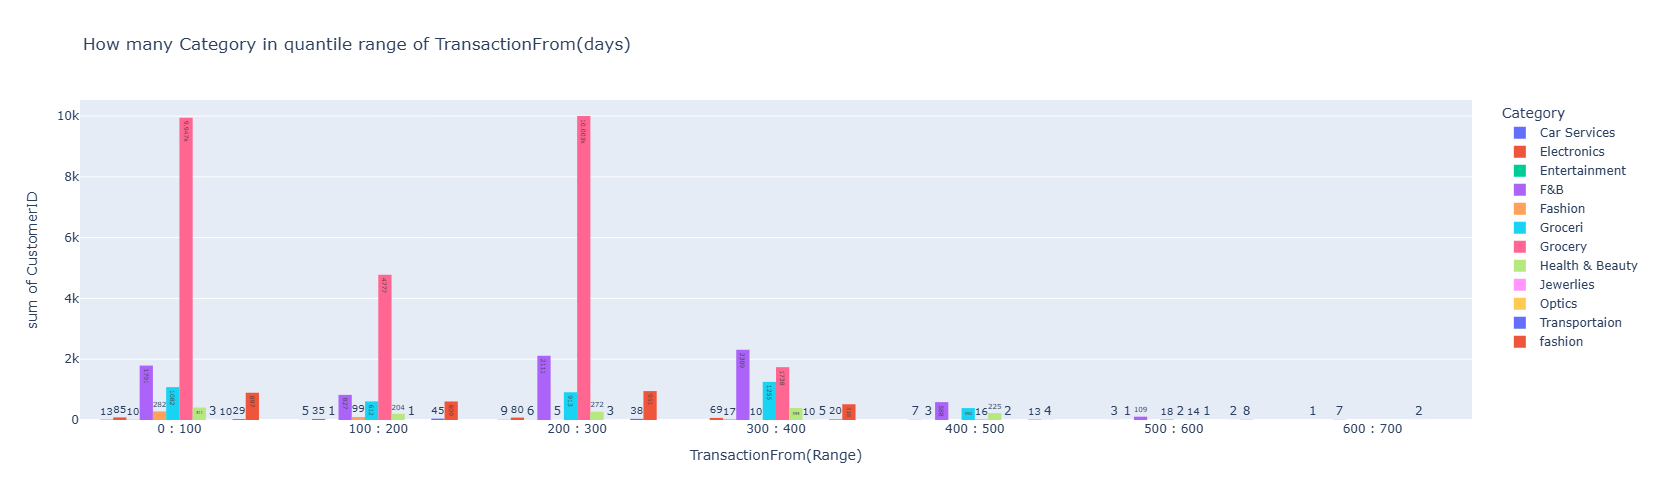

In [392]:
# How many Category in quantile range of TransactionFrom(days)
df['TransactionFrom(days)'] = pd.to_numeric(df['TransactionFrom(days)'], errors='coerce')
df['CustomerLastTransactionFrom(days)'] = pd.to_numeric(df['CustomerLastTransactionFrom(days)'], errors='coerce')

bins = [0 , 100 , 200 , 300 , 400 , 500 , 600 , 700 , 800 ]
labels = ['0 : 100' , '100 : 200' , '200 : 300' , '300 : 400' , '400 : 500' , '500 : 600' , '600 : 700' , '700 : 800']

bins_1 = [0 , 100 , 200 , 300 , 400 , 500 , 600 , 700 ]
labels_1 = ['0 : 100' , '100 : 200' , '200 : 300' , '300 : 400' , '400 : 500' , '500 : 600' , '600 : 700']

df['TransactionFrom(Range)'] = pd.cut(df['TransactionFrom(days)'] , bins=bins , labels=labels)
df['CustomerLastTransactionFrom(Range)'] = pd.cut(df['CustomerLastTransactionFrom(days)'] , bins=bins_1 , labels=labels_1)

msk_9 = df.groupby(['Category' , 'TransactionFrom(Range)'], observed=True)[['CustomerID']].count().reset_index()
px.histogram(msk_9 , x = 'TransactionFrom(Range)' , y = 'CustomerID' , color='Category' , barmode='group' , text_auto=True , width=1500 , height=500 , title = 'How many Category in quantile range of TransactionFrom(days)')

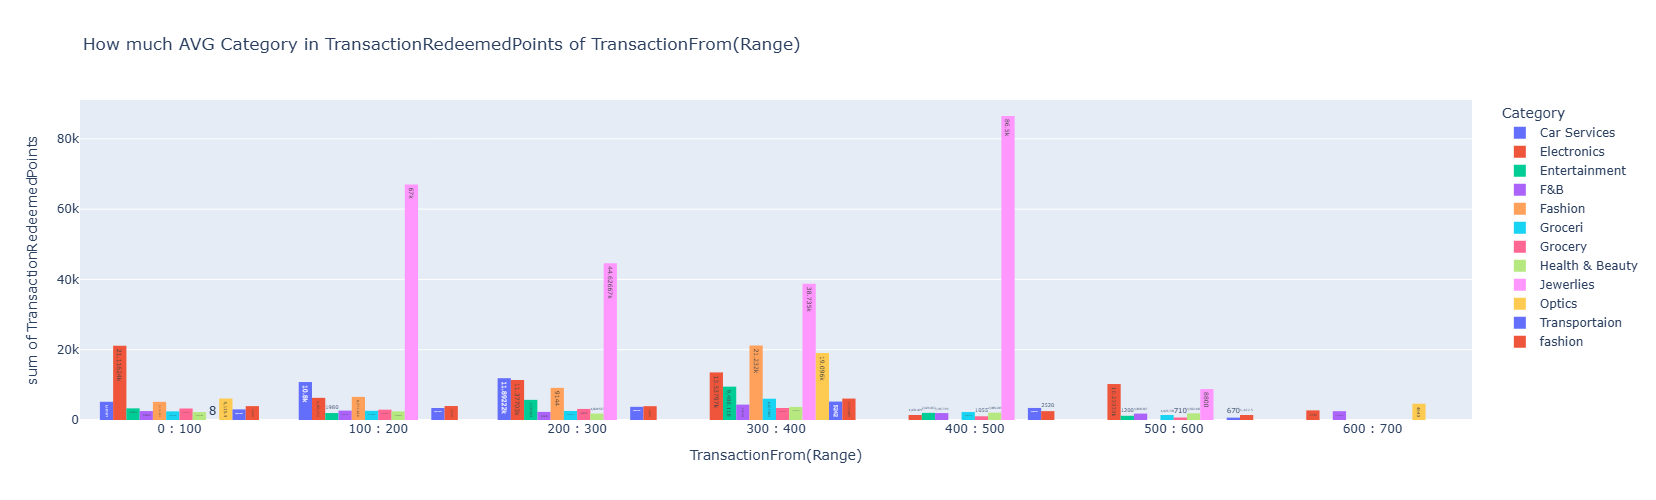

In [396]:
# How much AVG Category in TransactionRedeemedPoints of TransactionFrom(Range)
msk_10 = df.groupby(['Category' , 'TransactionFrom(Range)'], observed=True)[['TransactionRedeemedPoints']].mean().reset_index()
px.histogram(msk_10 , x = 'TransactionFrom(Range)' , y = 'TransactionRedeemedPoints' , color='Category' , barmode='group' , text_auto=True , width=1500 , height=500 , title = 'How much AVG Category in TransactionRedeemedPoints of TransactionFrom(Range)')

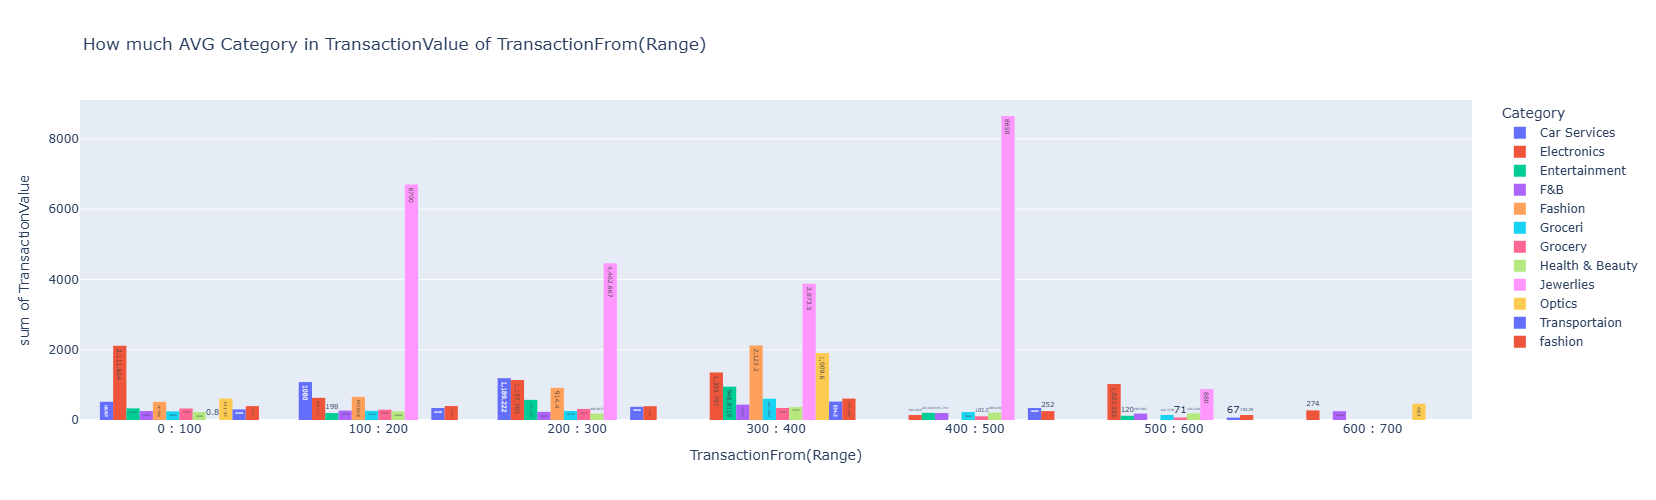

In [405]:
# How much AVG Category in TransactionValue of TransactionFrom(Range)
msk_11 = df.groupby(['Category' , 'TransactionFrom(Range)'], observed=True)[['TransactionValue']].mean().reset_index()
px.histogram(msk_11 , x = 'TransactionFrom(Range)' , y = 'TransactionValue' , color='Category' , barmode='group' , text_auto=True , width=1500 , height=500 , title = 'How much AVG Category in TransactionValue of TransactionFrom(Range)')

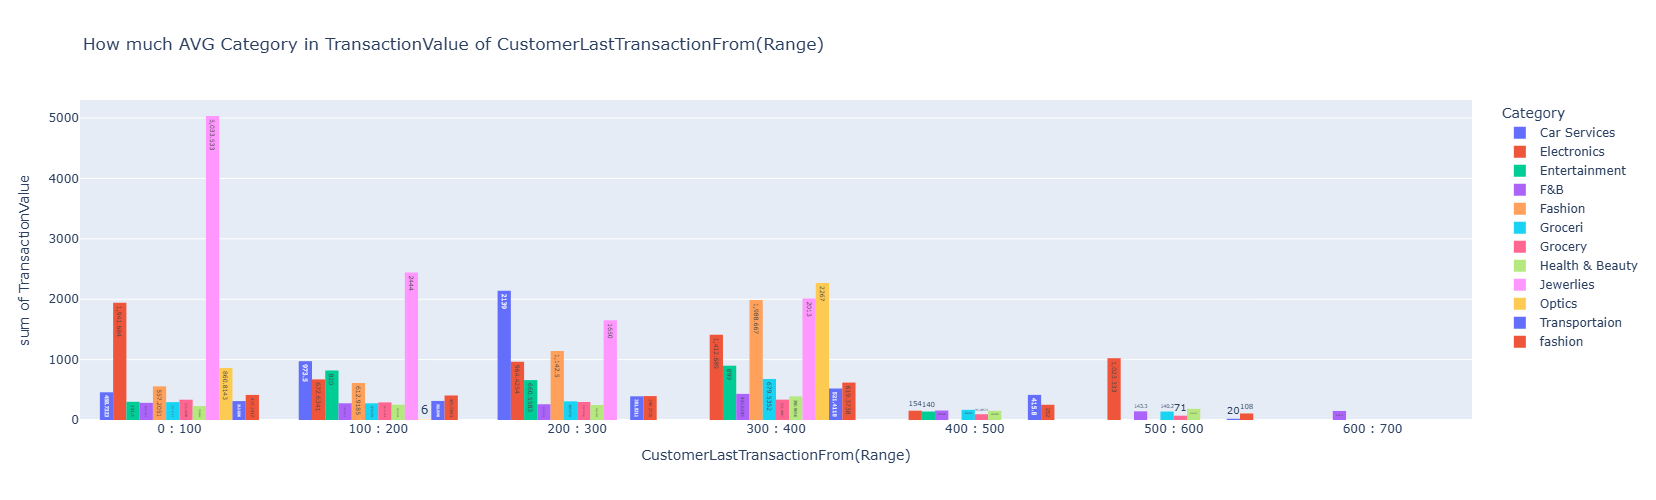

In [406]:
# How much AVG Category in TransactionValue of CustomerLastTransactionFrom(Range)
msk_12 = df.groupby(['Category' , 'CustomerLastTransactionFrom(Range)'], observed=True)[['TransactionValue']].mean().reset_index()
px.histogram(msk_12 , x = 'CustomerLastTransactionFrom(Range)' , y = 'TransactionValue' , color='Category' , barmode='group' , text_auto=True , width=1500 , height=500 , 
             title = 'How much AVG Category in TransactionValue of CustomerLastTransactionFrom(Range)')

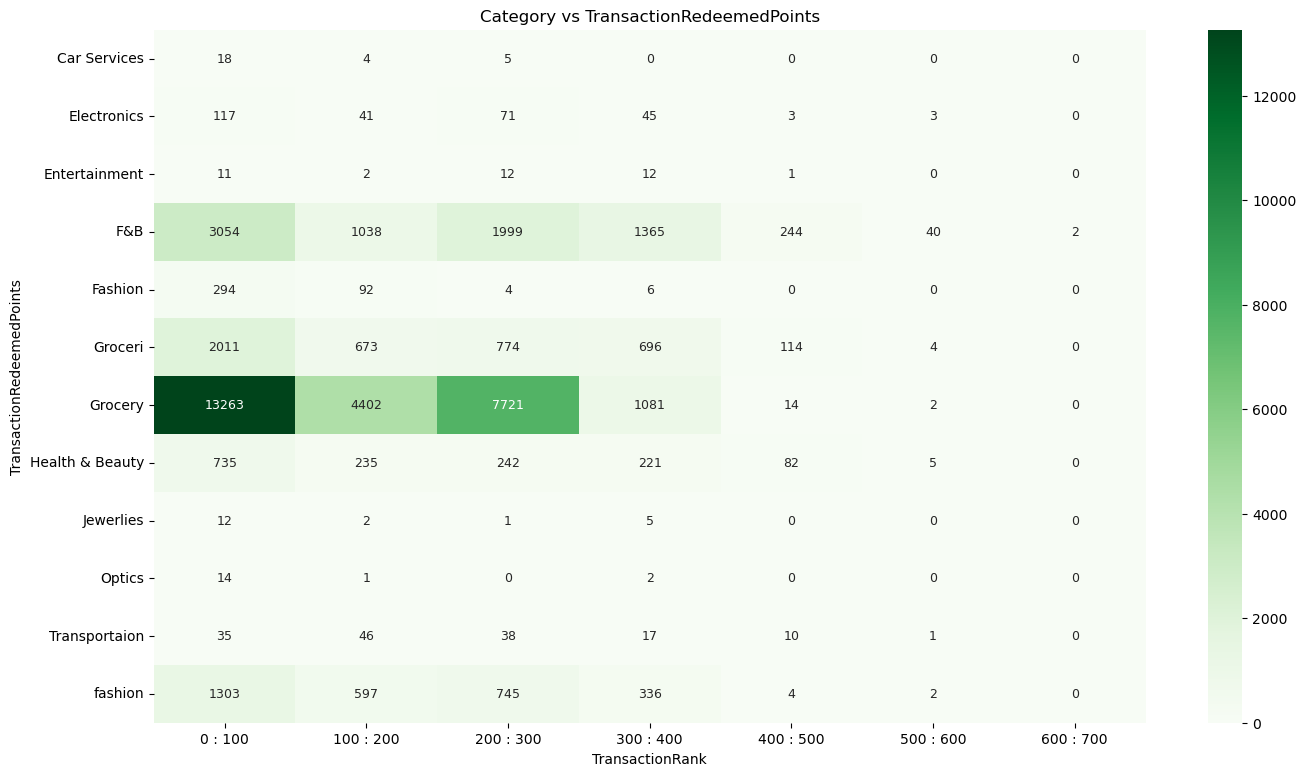

In [407]:
msk_13 = pd.crosstab (df.Category , df['CustomerLastTransactionFrom(Range)'] , df.CustomerID , aggfunc='count').replace(np.nan , 0)
heatmap(msk_13, 'Category vs TransactionRedeemedPoints', 'TransactionRank', 'TransactionRedeemedPoints',  cmap='Greens')

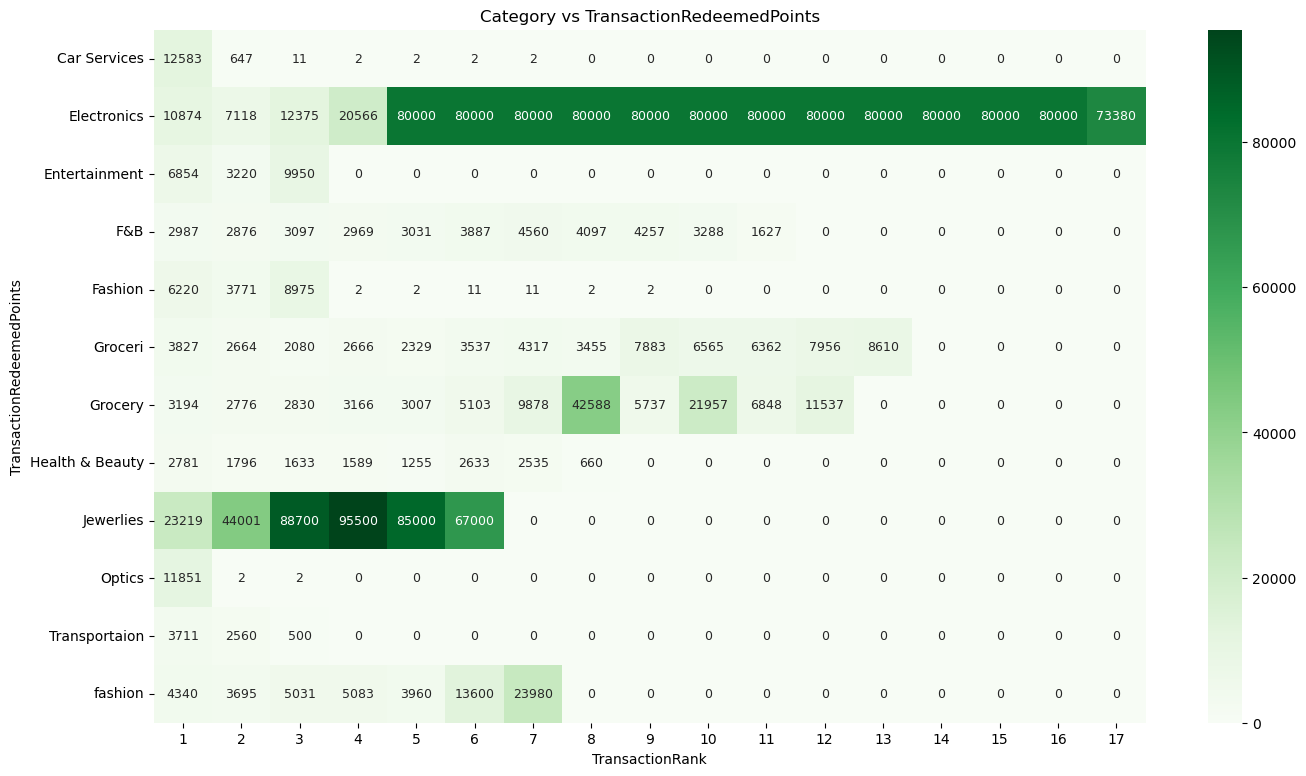

In [408]:
# Generate a heatmap
msk_14 = pd.crosstab (df.Category , df.TransactionRank , df.TransactionRedeemedPoints , aggfunc='mean').replace(np.nan , 0)
heatmap(msk_14, 'Category vs TransactionRedeemedPoints', 'TransactionRank', 'TransactionRedeemedPoints',  cmap='Greens')

In [428]:
df.head(1)

CustomerID   MerchantName Category  TransactionRank  \
0           1  Grill Emperor      F&B                1   

   TransactionRedeemedPoints  TransactionValue  TransactionFrom(days)  \
0                       4427            442.70                    281   

   CustomerLastTransactionFrom(days) TransactionFrom(Range)  \
0                                281              200 : 300   

  CustomerLastTransactionFrom(Range)  
0                          200 : 300

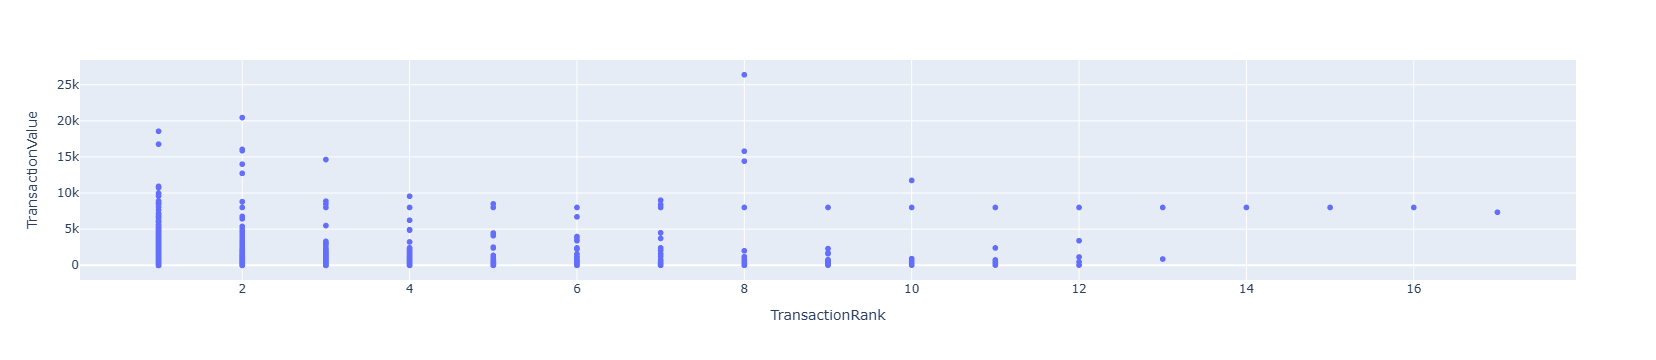

In [432]:
px.scatter(df , x = 'TransactionRank' , y='TransactionValue' )

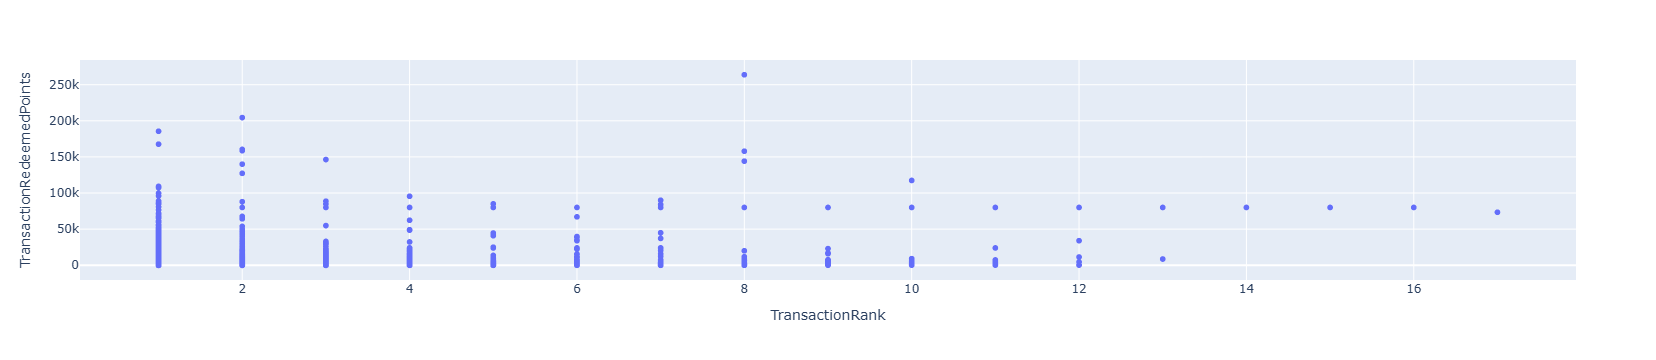

In [431]:
px.scatter(df , x = 'TransactionRank' , y='TransactionRedeemedPoints' )

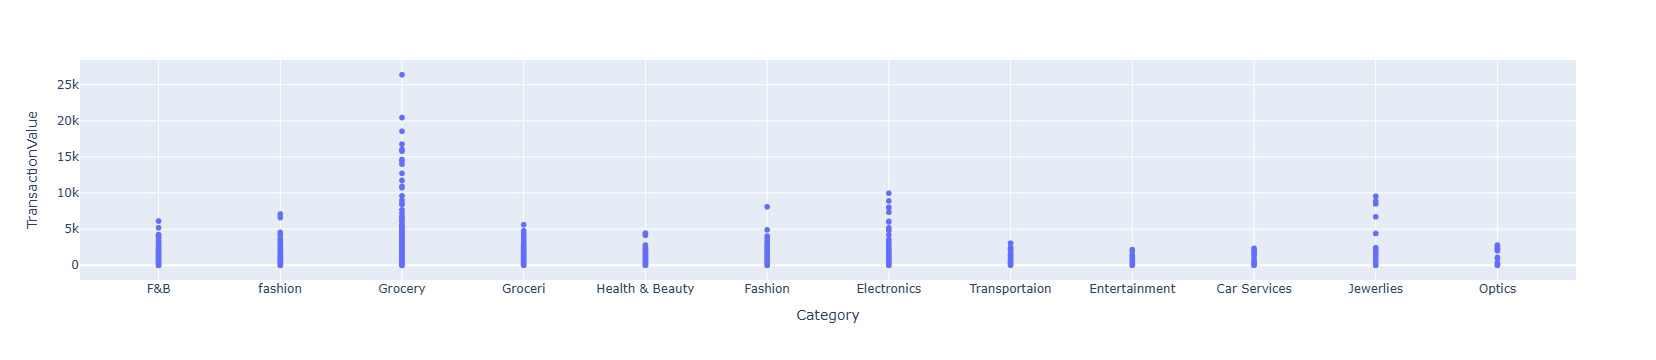

In [433]:
px.scatter(df , x = 'Category' , y='TransactionValue' )

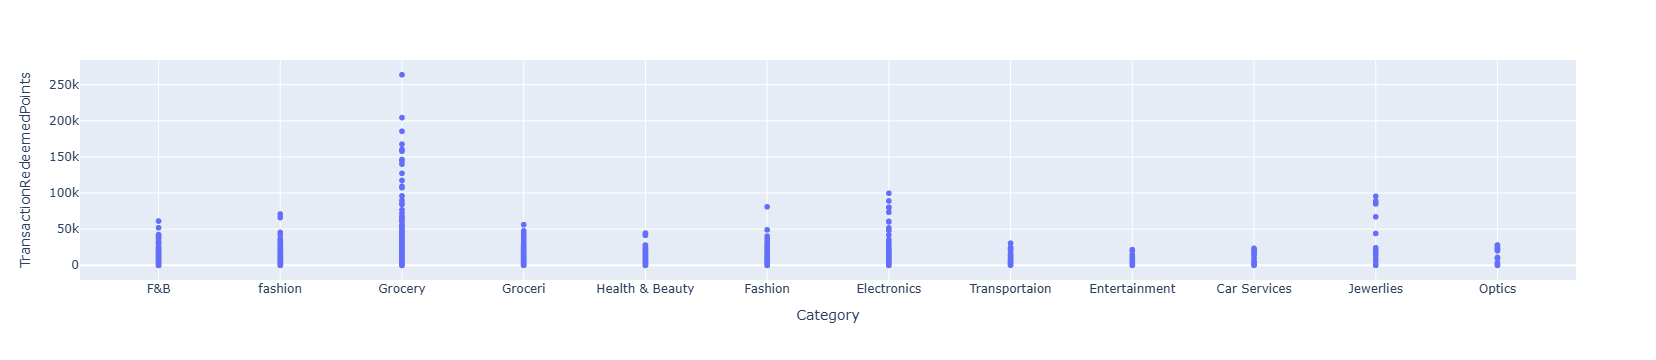

In [430]:
px.scatter(df , x = 'Category' , y='TransactionRedeemedPoints' )

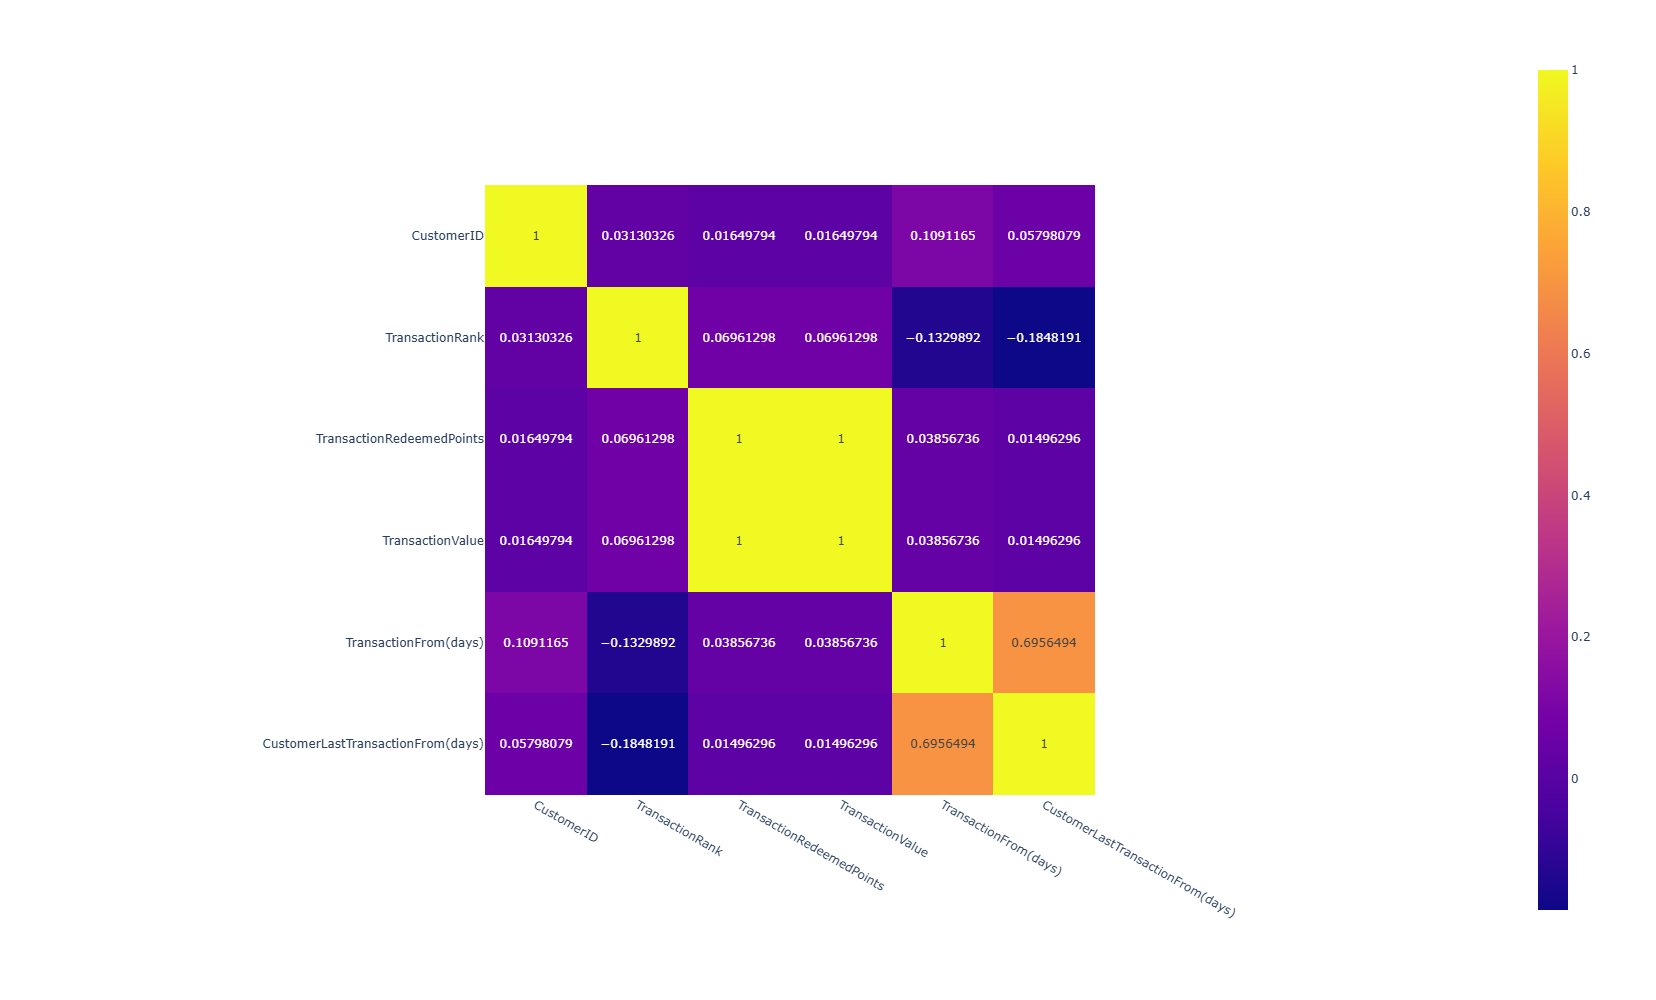

In [439]:
corr = df.select_dtypes(include='number').corr()
px.imshow(corr  , width=1000 , height=1000, text_auto=True)

### 🔻 RFM Analysis

In [440]:
df.head(1)

CustomerID   MerchantName Category  TransactionRank  \
0           1  Grill Emperor      F&B                1   

   TransactionRedeemedPoints  TransactionValue  TransactionFrom(days)  \
0                       4427            442.70                    281   

   CustomerLastTransactionFrom(days) TransactionFrom(Range)  \
0                                281              200 : 300   

  CustomerLastTransactionFrom(Range)  
0                          200 : 300

In [445]:
df.shape

(43929, 10)

In [460]:
# Calculating RFM
rfm_df = df.groupby(['CustomerID']).agg({
    'CustomerLastTransactionFrom(days)': 'min',  # Recency
    'TransactionRank': 'count',                 # Frequency
    'TransactionValue': 'sum'                   # Monetary
}).reset_index()
rfm_df.columns = ['CustomerID','Recency', 'Frequency', 'Monetary']
rfm_df

CustomerID  Recency  Frequency  Monetary
0               1      281          1    442.70
1               2       34          1    249.00
2               3      236          1    300.00
3               4      320          1    162.00
4               5      407          1     70.00
...           ...      ...        ...       ...
33516       33517      101          3    594.00
33517       33518      244          1     48.00
33518       33519      256          1    132.00
33519       33520       13          1    210.00
33520       33521       55          3    568.00

[33521 rows x 4 columns]

In [461]:
df.isnull().sum()

CustomerID                            0
MerchantName                          0
Category                              0
TransactionRank                       0
TransactionRedeemedPoints             0
TransactionValue                      0
TransactionFrom(days)                 0
CustomerLastTransactionFrom(days)     0
TransactionFrom(Range)                0
CustomerLastTransactionFrom(Range)    0
dtype: int64

In [462]:
rfm_df.describe().T

count      mean      std  min      25%       50%       75%  \
CustomerID 33,521.00 16,761.00 9,676.82 1.00 8,381.00 16,761.00 25,141.00   
Recency    33,521.00    160.71   115.81 1.00    41.00    154.00    259.00   
Frequency  33,521.00      1.31     0.97 1.00     1.00      1.00      1.00   
Monetary   33,521.00    439.35 1,434.11 0.00   150.00    216.00    365.80   

                  max  
CustomerID  33,521.00  
Recency        682.00  
Frequency       54.00  
Monetary   165,183.80

In [463]:
rfm_df[rfm_df.Monetary == 0]

CustomerID  Recency  Frequency  Monetary
7229        7230      351          7      0.00

In [464]:
rfm_df['RecencyScore'] = pd.qcut(rfm_df.Recency , 5 , labels=[5,4,3,2,1])
rfm_df['FrequencyScore'] = pd.qcut(rfm_df.Frequency.rank(method='first') , 5 , labels=[1,2,3,4,5])
rfm_df['MonetaryScore'] = pd.qcut(rfm_df.Monetary , 5 , labels=[1,2,3,4,5])
rfm_df

CustomerID  Recency  Frequency  Monetary RecencyScore FrequencyScore  \
0               1      281          1    442.70            1              1   
1               2       34          1    249.00            5              1   
2               3      236          1    300.00            2              1   
3               4      320          1    162.00            1              1   
4               5      407          1     70.00            1              1   
...           ...      ...        ...       ...          ...            ...   
33516       33517      101          3    594.00            3              5   
33517       33518      244          1     48.00            2              5   
33518       33519      256          1    132.00            2              5   
33519       33520       13          1    210.00            5              5   
33520       33521       55          3    568.00            4              5   

      MonetaryScore  
0                 5  
1                 3  
2                 4  
3                 2  
4                 1  
...             ...  
33516             5  
33517             1  
33518             1  
33519             3  
33520             5  

[33521 rows x 7 columns]

In [602]:
def Final_Score(row):
    return ((row['RecencyScore']/5) * 0.40) + ((row['FrequencyScore']/5) * 0.30) + ((row['MonetaryScore']/5) * 0.30)

# Apply the function to each row
rfm_df['RFM_Score'] = rfm_df.apply(Final_Score, axis=1)
rfm_df

CustomerID  Recency  Frequency  Monetary RecencyScore FrequencyScore  \
0               1      281          1    442.70            1              1   
1               2       34          1    249.00            5              1   
2               3      236          1    300.00            2              1   
3               4      320          1    162.00            1              1   
4               5      407          1     70.00            1              1   
...           ...      ...        ...       ...          ...            ...   
33516       33517      101          3    594.00            3              5   
33517       33518      244          1     48.00            2              5   
33518       33519      256          1    132.00            2              5   
33519       33520       13          1    210.00            5              5   
33520       33521       55          3    568.00            4              5   

      MonetaryScore  Cluster  RFM_Score  
0                 5        1       0.44  
1                 3        0       0.64  
2                 4        1       0.46  
3                 2        1       0.26  
4                 1        1       0.20  
...             ...      ...        ...  
33516             5        2       0.84  
33517             1        1       0.52  
33518             1        1       0.52  
33519             3        0       0.88  
33520             5        2       0.92  

[33521 rows x 9 columns]

### 🔻 Modeling

In [603]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import make_scorer, silhouette_score

In [613]:
# Scaling
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm_df[['Recency', 'Frequency', 'Monetary','RFM_Score']])
rfm_scaled

array([[ 1.03868292, -0.32163582,  0.00233714, -0.81946568],
       [-1.09407357, -0.32163582, -0.13273141,  0.19439391],
       [ 0.65012404, -0.32163582, -0.09716871, -0.71807972],
       ...,
       [ 0.82281688, -0.32163582, -0.21431645, -0.41392184],
       [-1.27540105, -0.32163582, -0.15992642,  1.41102543],
       [-0.9127461 ,  1.75014633,  0.08970983,  1.61379735]])

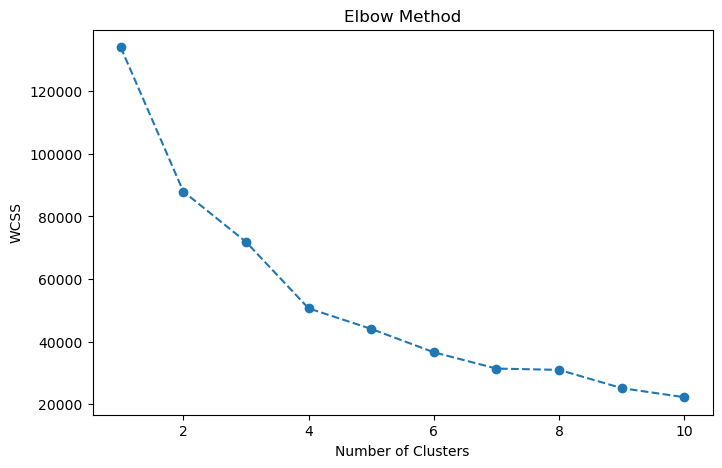

In [605]:
# Try different cluster sizes
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(rfm_scaled)  # Use your scaled RFM data here
    wcss.append(kmeans.inertia_)  # inertia_ is the WCSS for KMeans

# Plot the WCSS values
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

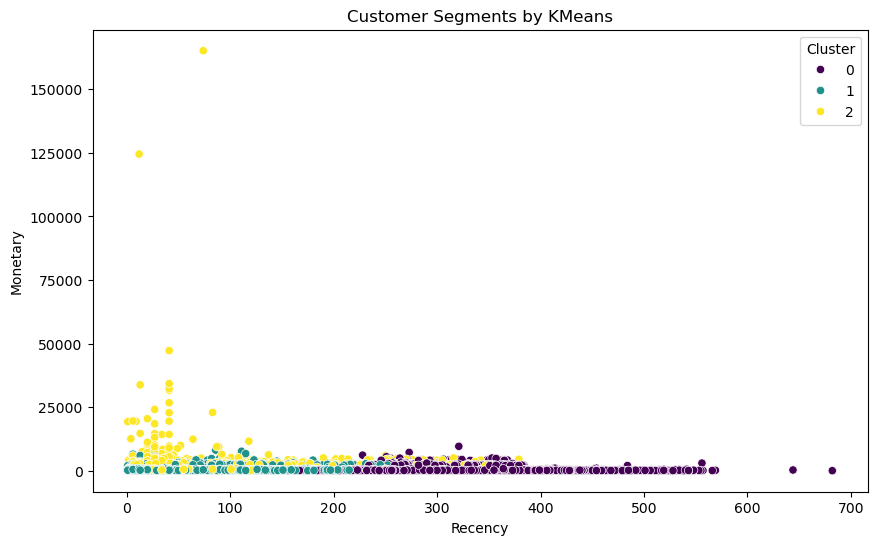

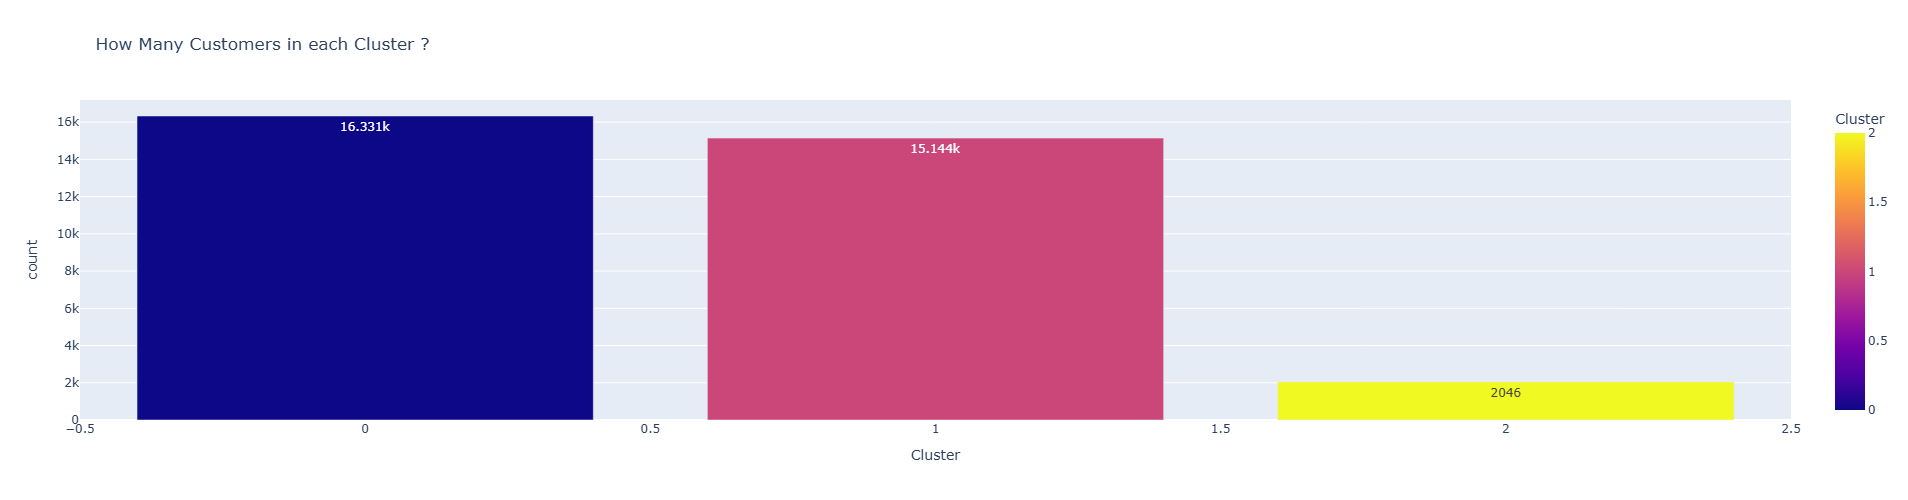

In [606]:
# Define number of clusters
kmeans = KMeans(n_clusters=3)
rfm_df['Cluster'] = kmeans.fit_predict(rfm_scaled)

# Visualize clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x=rfm_df['Recency'], y=rfm_df['Monetary'], hue=rfm_df['Cluster'], palette='viridis')
plt.title('Customer Segments by KMeans')
plt.show()

# Plot Count of Custoers in each Cluster
clus_1 = rfm_df['Cluster'].value_counts().reset_index()
px.bar(clus_1 , x = 'Cluster' , y = 'count' , color='Cluster' , text_auto=True , barmode='group' , title='How Many Customers in each Cluster ?' , width=900 , height=500)

* Merge All Data 

In [835]:
new_df = df.merge(rfm_df , left_on= 'CustomerID' , right_on=  'CustomerID' ).drop(['TransactionFrom(Range)','CustomerLastTransactionFrom(Range)'] , axis=1)

new_df

CustomerID         MerchantName Category  TransactionRank  \
0               1        Grill Emperor      F&B                1   
1               2       Threads Royale  fashion                1   
2               3             Cakeland      F&B                1   
3               4       Threads Royale  fashion                1   
4               5           Quick Stop  Grocery                1   
...           ...                  ...      ...              ...   
43924       33519          Zest Market  Groceri                1   
43925       33520          Zest Market  Groceri                1   
43926       33521  Marketplace Central  Grocery                1   
43927       33521  Marketplace Central  Grocery                2   
43928       33521        Peppers Diner      F&B                1   

       TransactionRedeemedPoints  TransactionValue  TransactionFrom(days)  \
0                           4427            442.70                    281   
1                           2490            249.00                     34   
2                           3000            300.00                    236   
3                           1620            162.00                    320   
4                            700             70.00                    407   
...                          ...               ...                    ...   
43924                       1320            132.00                    256   
43925                       2100            210.00                     13   
43926                       2180            218.00                    225   
43927                       1540            154.00                     55   
43928                       1960            196.00                    449   

       CustomerLastTransactionFrom(days)  Recency  Frequency  Monetary  \
0                                    281      281          1    442.70   
1                                     34       34          1    249.00   
2                                    236      236          1    300.00   
3                                    320      320          1    162.00   
4                                    407      407          1     70.00   
...                                  ...      ...        ...       ...   
43924                                256      256          1    132.00   
43925                                 13       13          1    210.00   
43926                                 55       55          3    568.00   
43927                                 55       55          3    568.00   
43928                                 55       55          3    568.00   

      RecencyScore FrequencyScore MonetaryScore  Cluster  RFM_Score  
0                1              1             5        0       0.44  
1                5              1             3        1       0.64  
2                2              1             4        0       0.46  
3                1              1             2        0       0.26  
4                1              1             1        0       0.20  
...            ...            ...           ...      ...        ...  
43924            2              5             1        0       0.52  
43925            5              5             3        1       0.88  
43926            4              5             5        2       0.92  
43927            4              5             5        2       0.92  
43928            4              5             5        2       0.92  

[43929 rows x 16 columns]

* Display Category vs Cluster vs RFM_Score Details

In [609]:
Pred_df = pd.crosstab (new_df['Category'] ,  new_df['Cluster'] ,new_df['RFM_Score'] , aggfunc='mean' ,dropna=True).replace(np.nan , 0).reset_index()
display(Pred_df)

def calculate_percentage(row):
    total = row.sum()
    return (row / total) * 100 if total != 0 else row

percentage_df = Pred_df.set_index('Category').apply(calculate_percentage, axis=1).reset_index()

percentage_df

Cluster         Category    0    1    2
0           Car Services 0.68 0.76 0.72
1            Electronics 0.53 0.79 0.90
2          Entertainment 0.50 0.81 0.73
3                    F&B 0.45 0.76 0.87
4                Fashion 0.50 0.77 0.88
5                Groceri 0.47 0.77 0.89
6                Grocery 0.45 0.75 0.90
7        Health & Beauty 0.43 0.76 0.89
8              Jewerlies 0.63 0.00 0.91
9                 Optics 0.62 0.93 0.84
10         Transportaion 0.48 0.72 0.78
11               fashion 0.47 0.76 0.91

Cluster         Category     0     1     2
0           Car Services 31.66 34.89 33.45
1            Electronics 23.88 35.58 40.54
2          Entertainment 24.65 39.66 35.69
3                    F&B 21.83 36.46 41.70
4                Fashion 23.31 35.73 40.96
5                Groceri 21.92 36.09 41.99
6                Grocery 21.56 35.59 42.84
7        Health & Beauty 20.58 36.46 42.96
8              Jewerlies 41.00  0.00 59.00
9                 Optics 25.94 38.91 35.15
10         Transportaion 24.41 36.37 39.22
11               fashion 22.11 35.65 42.24

### 🔻 Deployment

In [833]:
def Cut_Merch( x ) :
    Cust_Cluster = float(rfm_df[rfm_df['CustomerID'] == x ]['Cluster'].iloc[0])
    Top_Cat = new_df[new_df.Cluster == Cust_Cluster].groupby(['Category'])['RFM_Score'].mean().nlargest(2).index.tolist()
    Top_Cat_Details = new_df[new_df.Cluster == Cust_Cluster].groupby(['Category'])['RFM_Score'].mean().nlargest(2).reset_index()
    Top_Merchants = new_df[(new_df.Cluster == Cust_Cluster) & (new_df.Category.isin(Top_Cat))].groupby(['MerchantName'])['RFM_Score'].mean().nlargest(3).index.tolist()
    Top_Merchants_Details = new_df[(new_df.Cluster == Cust_Cluster) & (new_df.Category.isin(Top_Cat))].groupby(['MerchantName'])['RFM_Score'].mean().nlargest(3).reset_index()
    print(f'Customer Code : {x}\n\nTop Categories :')
    display(Top_Cat_Details)
    print(f'Top_Merchants : {Top_Merchants}')
    display(Top_Merchants_Details)

Cut_Merch( 4 )

Customer Code : 4

Top Categories :


Category  RFM_Score
0  Car Services       0.68
1     Jewerlies       0.63

Top_Merchants : ['TickTock Time', 'Gemstone Gallery', 'Diamond Dreams']


MerchantName  RFM_Score
0     TickTock Time       0.68
1  Gemstone Gallery       0.64
2    Diamond Dreams       0.62

In [836]:
rfm_df.to_csv('rfm_data.csv')
new_df.to_csv('new_data.csv')

In [848]:
%%writefile app.py
import streamlit as st
import pandas as pd

# Assuming rfm_df and new_df are defined DataFrames
# Replace this with your actual data loading code
# Example:
rfm_df = pd.read_csv('rfm_data.csv')
new_df = pd.read_csv('new_data.csv')


pd.options.display.float_format ='{:,.2f}'.format
st.set_page_config (page_title = 'RFM' , layout = "wide" , page_icon = 'Z')
st.title("RFM analysis")

# Sidebar
brief = st.sidebar.checkbox(":red[Brief about Project]")
Planning = st.sidebar.checkbox(":green[About Project]")
About_me = st.sidebar.checkbox(":green[About me]")

if brief:
    st.sidebar.header(":red[Brief about Project]")
    st.sidebar.write("""
    * RFM analysis (Recency, Frequency, Monetary) is a proven marketing model for customer segmentation. 
    * It helps businesses understand and segment their customers based on their purchasing behavior. 
    * By applying clustering algorithms to RFM data, businesses can more precisely group customers into different segments, 
    * which allows for more targeted marketing strategies and personalized communication.
    * :red[So let us see the insights 👀.]
    """)
# Planning
if Planning :
    st.sidebar.header(":green[About Project]")
    st.sidebar.subheader ('RFM analysis')
    st.sidebar.write("""
    * This project during my Intership @ Epsilon AI (https://www.epsiloneg.com/). 

    """)
    st.sidebar.write("""
    * Features Used during Project :
        * CustomerID	
        * MerchantName	
        * Category	
        * TransactionRank	
        * TransactionRedeemedPoints	
        * TransactionValue	
        * TransactionFrom(days)	
        * CustomerLastTransactionFrom(days)	
        * Recency	
        * Frequency	
        * Monetary	
        * RecencyScore	
        * FrequencyScore	
        * MonetaryScore	
        * Cluster	
        * RFM_Score
    """)
# Aboutme
if About_me :
    st.sidebar.header(":green[About me]")
    st.sidebar.write("""
    - Osama SAAD
    - Certified Data Science - Epsilon AI
    - Infor EAM Master Data and Assets Control Section Head @Ibnsina Pharma
    - LinkedIn: 
        https://www.linkedin.com/in/ossama-ahmed-saad-525785b2
    - Github : 
        https://github.com/OsamaSamnudi
    """)

tab1, = st.tabs(['🧠Prediction🤖'])

with tab1:
    with st.container():
        st.header("🧠 Prediction🤖")
        # Define your Cut_Merch function
        def Cut_Merch(x):
            Cust_Cluster = float(rfm_df[rfm_df['CustomerID'] == x]['Cluster'].iloc[0])
        
            # Get top categories and their details
            Top_Cat = new_df[new_df.Cluster == Cust_Cluster].groupby(['Category'])['RFM_Score'].mean().nlargest(2).index.tolist()
            Top_Cat_Details = new_df[new_df.Cluster == Cust_Cluster].groupby(['Category'])['RFM_Score'].mean().nlargest(2).reset_index()
        
            # Get top merchants and their details
            Top_Merchants = new_df[(new_df.Cluster == Cust_Cluster) & (new_df.Category.isin(Top_Cat))].groupby(['MerchantName'])['RFM_Score'].mean().nlargest(3).index.tolist()
            Top_Merchants_Details = new_df[(new_df.Cluster == Cust_Cluster) & (new_df.Category.isin(Top_Cat))].groupby(['MerchantName'])['RFM_Score'].mean().nlargest(3).reset_index()
        
            # Streamlit output
            st.write(f"Customer Code: {x}\n")
            
            st.write("Top Categories:")
            st.dataframe(Top_Cat_Details)  # Display category details in a table
            
            st.write(f"Top Merchants: {Top_Merchants}")
            st.dataframe(Top_Merchants_Details)  # Display merchant details in a table
        
        # Streamlit interface
        st.title("Customer Recommendation App")
        
        # Text input for "Customer Code"
        customer_code = st.text_input("Enter Customer Code:")
        
        # Check if the user has input a value
        if customer_code:
            try:
                # Convert the input to an integer
                customer_code_int = int(customer_code)
                # Call the function with the provided customer code
                Cut_Merch(customer_code_int)
            except ValueError:
                st.error("Please enter a valid Customer Code (numeric).")

Overwriting app.py


In [846]:
!streamlit run app.py

^C


In [849]:
!pip install pipreqs
!pipreqs

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
   ---------------------------------------- 0.0/798.3 kB ? eta -:--:--
   ------------- -------------------------- 262.1/798.3 kB ? eta -:--:--
   ---------------------------------------- 798.3/798.3 kB 2.1 MB/s eta 0:00:00
  Created wheel for docopt: filename=docopt-0.6.2-py2.py3-none-any.whl size=13775 sha256=cd4012e397eb2757a2997b21c122c4a6ead4a8660a8b13b15eb61875d68e40dd
  Stored in directory: c:\users\administrator\appdata\local\pip\cache\wheels\1a\bf\a1\4cee4f7678c68c5875ca89eaccf460593539805c3906722228
Successfully built docopt
  Attempting uninstall: ipython
    Found existing installation: ipython 8.27.0
    Uninstalling ipython-8.27.0:
      Successfully uninstalled ipython-8.27.0
  Attempting uninstall: nbconvert
    Found existing installation: nbconvert 7.10.0
    Uninstalling nbconvert-7.10.0:
      Successfully uninstalled nbconvert-7.10.0


INFO: Not scanning for jupyter notebooks.
Please, verify manually the final list of requirements.txt to avoid possible dependency confusions.
INFO: Successfully saved requirements file in D:\Data Science (Material)\01-Epslion\04-Internship (Karim Hamdy)\Projects\02 - ML- RFM_Clustering\requirements.txt
